# Inverse Mel-Frequency Cepstral Coeffficients 

### George Tzanetakis, University of Victoria

In this notebook we briefly look at the information loss that occurs when computing MFCCs as a representation for audio signals. 

In [12]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd


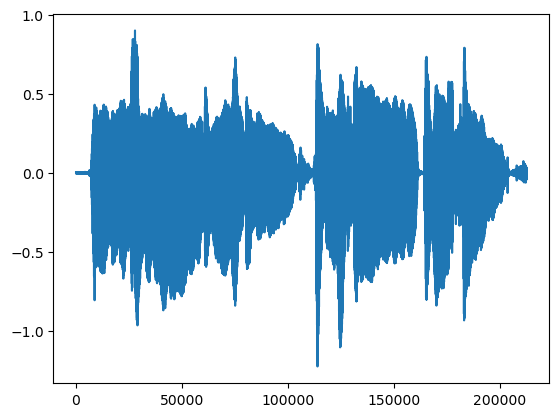

In [13]:
import scipy.io.wavfile as wav
srate, audio_signal = wav.read("amazing_grace_female.wav")
# scale to -1.0/1.0 
audio_signal = audio_signal.astype(np.float32) / 32767.0 
# make max be 0.9 
audio_signal = (0.9 / max(audio_signal)) * audio_signal

plt.figure() 
plt.plot(audio_signal)
ipd.Audio(audio_signal,rate=srate)

We compute MFCC using librosa, a python library for music information retrieval. We also use librosa 
to invert the transformation and go from MFCCs back to audio. This is a non-trivial process as the goal of MFCCs is to capture information about the underlying audio signal but to not represent it with sufficient information for reconstruction. We also compare the size of the original audio to the feature matrix of the MFCCs and observe some significant compression. To have good reconstructed audio as well as compression one needs to use perceptual 
audio compression techniques. This is a very interesting topic but we will not cover it in this session. 

In [3]:
print(212836.0 / 416.0)


511.625


In [4]:
mfcc = librosa.feature.mfcc(y=audio_signal, sr=srate)
print("Audio size: %d" % audio_signal.size)
print("MFCC dimesions: (%d,%0d)" % mfcc.shape)
print("MFCC size: %d" % mfcc.size)
print("Compression ratio: %2.2f%%" %  ((float(mfcc.size)/float(audio_signal.size)) * 100))

naudio_signal = librosa.feature.inverse.mfcc_to_audio(mfcc)
ipd.Audio(naudio_signal,rate=srate)

Audio size: 212836
MFCC dimesions: (20,416)
MFCC size: 8320
Compression ratio: 3.91%


Let's reconstruct another audio recording from the sequence of MFFCs. Hear how the transients are smeared over time and how the singing voice is much less pitched than the original. 

In [14]:
srate, audio_signal = wav.read("disco.00000.wav")
# scale to -1.0/1.0 
audio_signal = audio_signal.astype(np.float32) / 32767.0 
ipd.Audio(audio_signal, rate=srate)

In [15]:
mfcc = librosa.feature.mfcc(y=audio_signal, sr=srate)
naudio_signal = librosa.feature.inverse.mfcc_to_audio(mfcc)
ipd.Audio(naudio_signal,rate=srate)